,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


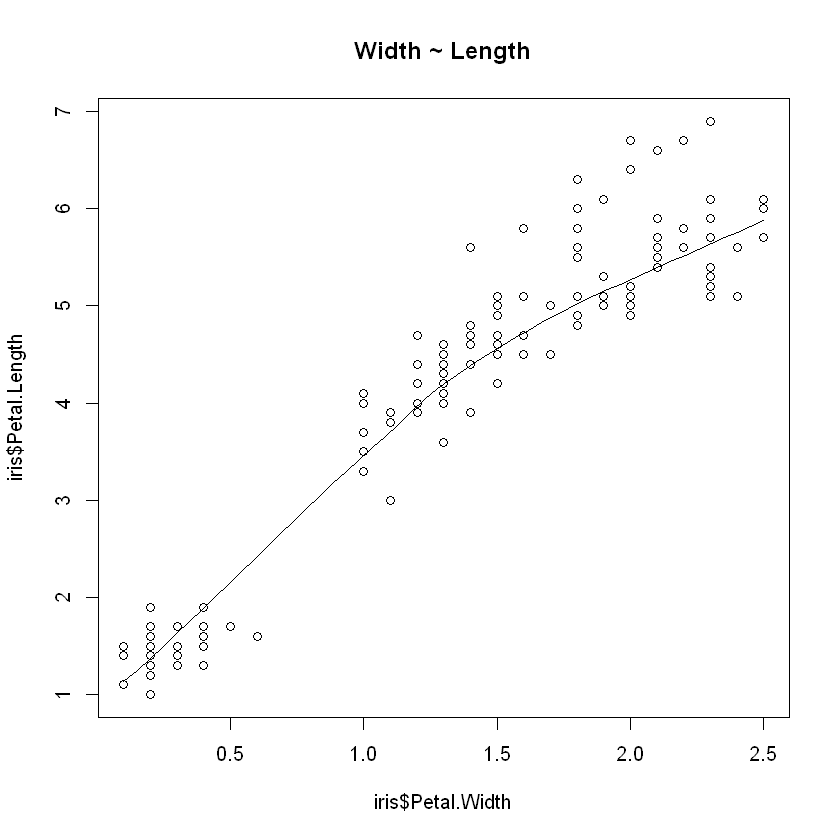

In [3]:
# data understanding
head(iris)
# scatter plot 
scatter.smooth(x=iris$Petal.Width, y=iris$Petal.Length, 
              main='Width ~ Length')

In [4]:
library('ggplot2')

In [5]:
plot = ggplot(data = iris, aes(x=Petal.Width, y=Petal.Length))+ 
        geom_point() + geom_smooth(method='lm') + 
        theme_bw(base_size=14)

`geom_smooth()` using formula 'y ~ x'



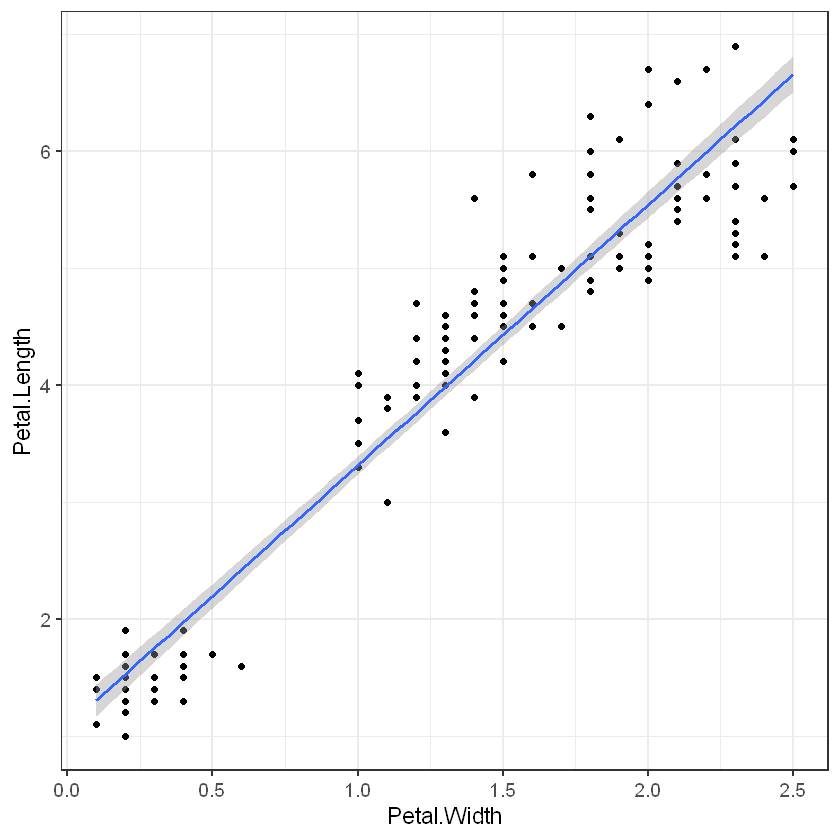

In [6]:
plot

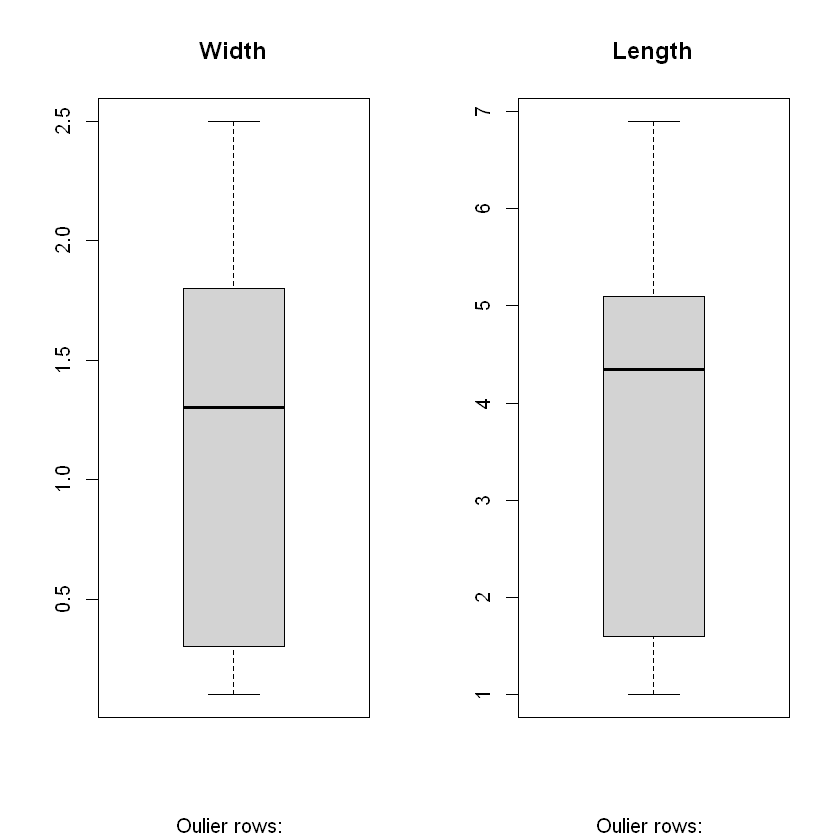

In [7]:
# boxplot to check for outliers
par(mfrow=c(1,2)) # divide graph area in 2 columns 
boxplot(iris$Petal.Width, main='Width',
       sub=paste('Oulier rows:', boxplot.stats(iris$Petal.Width)$out)) # box plot for 'width'
boxplot(iris$Petal.Length, main='Length',
       sub=paste('Oulier rows:', boxplot.stats(iris$Petal.Length)$out)) # box plot for 'Length'

In [8]:
# calculate correlation between Width and Length
print(cor(iris$Petal.Width, iris$Petal.Length))

[1] 0.9628654


In [10]:
# Create the training (development) and test (validation) data samples from original data
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex = sample(1:nrow(iris), 0.7*nrow(iris)) # row indices for training data
print('Selected training row indexes')
print(trainingRowIndex)
trainingData = iris[trainingRowIndex,] # training data
testData = iris[-trainingRowIndex,] # test data
print('Rows of training data and test data:')
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes"
  [1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103
[1] "Rows of training data and test data:"
[1] 105
[1] 45


In [13]:
# Develop the model on the training data and use it to predict the Length on test data
lmMod = lm(Petal.Length ~ Petal.Width, data=trainingData) # build the model
iPred = predict(lmMod, testData) # predict length

# mean square error according to model
mse = mean(lmMod$residuals^2)
print(paste('mse:', mse))

# mean square error of testData
mse_test = mean((testData$Petal.Length-iPred)^2)
print(paste('mse in test:', mse_test))

[1] "mse: 0.229979417628902"
[1] "mse in test: 0.217171445068203"


In [14]:
# Review diagnostic measures
print(summary(lmMod)) # model summary


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3496 -0.2976  0.0076  0.2329  1.4037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04175    0.08562   12.17   <2e-16 ***
Petal.Width  2.25325    0.06243   36.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4842 on 103 degrees of freedom
Multiple R-squared:  0.9267,	Adjusted R-squared:  0.926 
F-statistic:  1303 on 1 and 103 DF,  p-value: < 2.2e-16



In [18]:
# model coefficients
print(coef(lmMod))
# get beta estimate for height
beta_width = coef(lmMod)['Petal.Width'] # m
print(paste('slope:', beta_width))
Intercept = coef(lmMod)['(Intercept)'] # b
print(paste('Intercept:', Intercept))

(Intercept) Petal.Width 
   1.041753    2.253255 
[1] "slope: 2.25325489500747"
[1] "Intercept: 1.04175321056764"


In [20]:
# New predictions
# Solution 1
x = c(0.9, 1.5, 2.1)
y = Intercept + beta_width * x
print('Solution 1 - results:')
print(y)
# Solution 2
y1 = predict(lmMod, data.frame(Petal.Width=x))
print('Solution 2 - results:')
print(y1)

[1] "Solution 1 - results:"
[1] 3.069683 4.421636 5.773588
[1] "Solution 2 - results:"
       1        2        3 
3.069683 4.421636 5.773588 


In [ ]:
# Visualization
plot(iris$Petal.Width, iris$Petal.Length,
    main='Iris Linear regression',
    xlab=)